# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rachmat Risky Saputra
- Email: rachmatrisky5@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1:
<br>pada musim apa jumlah sewa sepeda harian paling banyak dan paling sedikit?
- pertanyaan 2:
<br>Apakah ada perbedaan yang signifikan antara tahun 2011 dan 2012 dalam jumlah sewa sepeda harian?

## Menyiapkan semua library yang dibutuhkan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

#### memuat tabel day dan tabel hour

membuat tabel day

In [23]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


membuat tabel hour

In [24]:
hour_df = pd.read_csv("data/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dari hasil output di atas. terlihat bahwa tidak ada missing value pada tabel day.

In [26]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari hasil output di atas. Terlihat bahwa tidak ada duplikasi data pada tabel day.

In [27]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hour

In [28]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada hasil output di atas, terlihat tidak ada permasalahan missing value pada tabel hour.

In [29]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


berdasarkan hasil output di atas. terlihat bahwa tidak ada duplikasi dan keanehan nilai pada tabel hour.

#### Menggabungkan tabel day dan hour

In [30]:
all_df = day_df.merge(
    hour_df,
    on="dteday",
    how="inner",
    suffixes=("_daily", "_hourly")
)

all_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### memeriksa gabungan tabel day dan hour

In [31]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

In [32]:
print(all_df.shape)
print(all_df.isnull().sum())

(17379, 32)
instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64


tidak terdapat missing value pada tiap kolom all_df

In [33]:
print("Jumlah duplikasi:", all_df.duplicated().sum())

Jumlah duplikasi: 0


dari hasil output di atas, tidak ada duplikasi data pada tabel all.

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explorasi data all_df

In [34]:
all_df.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


berdasarkan rangkuman parameter statistik di atas, bisa disimpulkan bahwa jumlah dari gabungan casual user dan registered user berada di kisaran 1 hingga 977 untuk setiap jamnya, dengan rata-rata jumlah sebesar 189.87.

In [35]:
all_df.groupby(by="season_daily").agg({
    "cnt_daily": ["sum", "max", "min", "mean", "std"],
})

cnt_daily                                      
                   sum   max   min         mean          std
season_daily                                                
1             11179147  7836   431  2635.348185  1391.789800
2             22024071  8362   795  4995.253119  1690.209773
3             25420803  8714  1115  5654.093194  1446.451168
4             20167029  8555    22  4765.366021  1654.202601

output di atas adalah rangkuman statistik variabel cnt_daily berdasarkan musim.

In [36]:
all_df.groupby(by=["yr_daily", "workingday_daily", "season_daily"]).agg({
    "cnt_daily": "sum",
}).sort_values(by="cnt_daily", ascending=False)

cnt_daily
yr_daily workingday_daily season_daily           
1        1                3              10928736
                          2               9434330
                          4               8599968
0        1                3               7039751
                          2               5680010
1        1                1               5451432
0        1                4               5265765
1        0                3               4466760
                          2               4265424
                          4               3746064
0        0                3               2985556
                          2               2644307
                          4               2555232
         1                1               2450185
1        0                1               2233068
0        0                1               1044462

Berdasarkan output di atas, terlihat bahwa jumlah sewa harian yang paling banyak terdapat pada tahun 2011, tepatnya saat working day dan pada musim gugur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa jumlah sewa sepeda harian paling banyak dan paling sedikit?

In [37]:
sum_season_cnt_df = all_df.groupby("season_daily").cnt_daily.sum().sort_values(ascending=False).reset_index()
sum_season_cnt_df.head()

,season_daily,cnt_daily
0,3,25420803
1,2,22024071
2,4,20167029
3,1,11179147


Text(0.5, 1.0, 'Jumlah seluruh sewa harian berdasarkan musim')

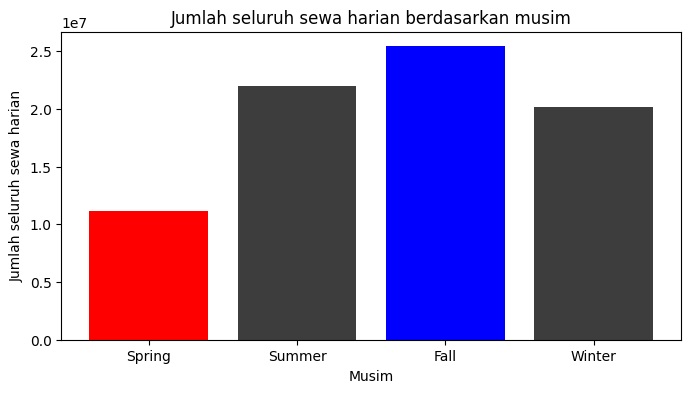

In [38]:
season_data = all_df.groupby("season_daily")["cnt_daily"].sum()
season_names = ["Spring", "Summer", "Fall", "Winter"]

figure, ax = plt.subplots(figsize=(8, 4))
ax.bar(season_names, season_data, color=["red", "#3d3d3d", "blue", "#3d3d3d"])
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah seluruh sewa harian")
ax.set_title("Jumlah seluruh sewa harian berdasarkan musim")

### Pertanyaan 2: Apakah ada perbedaan yang signifikan antara tahun 2011 dan 2012 dalam jumlah sewa sepeda harian? 

In [39]:
sum_year_cnt_df = all_df.groupby("yr_daily").cnt_daily.sum().sort_values(ascending=False).reset_index()
sum_year_cnt_df.head()

,yr_daily,cnt_daily
0,1,49125782
1,0,29665268


yr_daily
0    29665268
1    49125782
Name: cnt_daily, dtype: int64


Text(0.5, 1.0, 'perbedaan jumlah sewa harian pada tahun 2011 dan 2012')

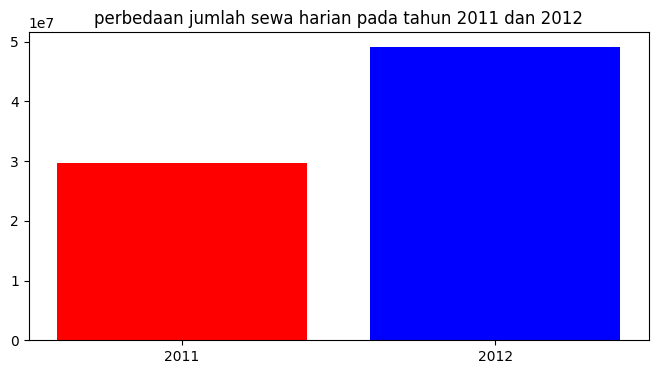

In [40]:
year = ["2011", "2012"]
year_data =  all_df.groupby("yr_daily")["cnt_daily"].sum()
print(year_data)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(year, year_data, color=["red", "blue"])
ax.set_title("perbedaan jumlah sewa harian pada tahun 2011 dan 2012")

In [41]:
year = ["2011", "2012"]
year_data =  all_df.groupby("yr_daily")["cnt_daily"].sum()

filter_ = all_df["yr_daily"] == 0
year_2011 = all_df[filter_].groupby("mnth_daily")["cnt_daily"].sum().sort_values(ascending=False)

print(year_2011)

mnth_daily
6     3444288
7     3392184
5     3259704
8     3243556
9     3048767
10    2961840
11    2448141
4     2273532
12    2091379
3     1511511
2     1119397
1      870969
Name: cnt_daily, dtype: int64


In [42]:
year_2012 = all_df[all_df["yr_daily"] == 1].groupby("mnth_daily")["cnt_daily"].sum().sort_values(ascending=False)
print(year_2012)


mnth_daily
9     5245752
8     5148072
7     4886568
6     4867920
10    4757430
5     4700760
4     4170578
3     3952089
11    3653298
12    2967179
2     2462764
1     2313372
Name: cnt_daily, dtype: int64


## Conclusion

- Conclution pertanyaan 1
Pertanyaan 1: Pada musim apa jumlah sewa sepeda harian paling banyak dan paling sedikit?
berdasarkan visualisasi di atas dapat disimpulkan bahwa pada musim gugur jumlah sewa harian yang paling banyak. sedangkan jumlah sewa harian yang paling sedikit terjadi di musim semi.
- conclution pertanyaan 2
dari hasil visualisasi di atas dapat kita ketahui bahwa terdapat perbedaan yang signifikan pada jumlah sewa harian. di mana pada tahun 2011 ada sebanyak kurang lebih 30 juta penyewaan dan di tahun 2012 ada lebih 40 juta penyewaan.